In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('../data/Social_Network_Ads.csv')

In [3]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
dataset['Purchased'].value_counts(1)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [5]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC

In [11]:
classifier = SVC(kernel = 'rbf', probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [14]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

metricas(classifier,X_test, y_test)

 Roc Validate: 0.965
 Acc Validate: 0.930
 Matrix Conf Validate:  
 [[64  4]
 [ 3 29]]


In [15]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


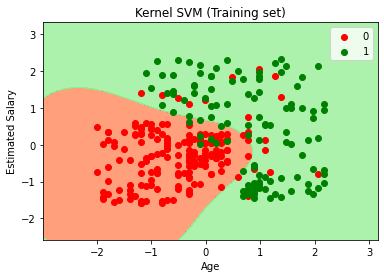

In [16]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('coral', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


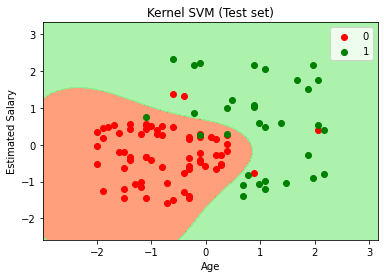

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('coral', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [18]:
classifier.C

1.0

In [23]:
classifier.support_vectors_

array([[ 0.58164944, -0.88670699],
       [ 1.07681071, -0.13288524],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [-0.01254409,  1.22979253],
       [ 0.38358493, -0.48080297],
       [ 0.77971394,  0.76590222],
       [-1.00286662,  0.56295021],
       [ 0.38358493,  0.30201192],
       [-1.10189888,  0.59194336],
       [-0.50770535,  1.25878567],
       [ 0.28455268,  0.30201192],
       [ 0.18552042,  0.24402563],
       [ 0.77971394, -0.30684411],
       [ 2.06713324, -0.79972756],
       [ 0.77971394,  0.12805305],
       [ 0.97777845,  2.07059371],
       [-0.30964085,  0.53395707],
       [ 1.17584296, -0.74174127],
       [-0.01254409,  0.30201192],
       [ 0.38358493,  0.1570462 ],
       [ 0.8787462 , -0.65476184],
       [ 1.27487521,  1.8676417 ],
       [ 0.68068169,  0.27301877],
       [ 0.48261718,  1.83864855],
       [ 0.77971394, -1.37959044],
       [-1.89415691, -1.46656987],
       [ 1.07681071,  0.12805305],
       [ 0.28455268,

In [20]:
len(classifier.support_vectors_)

88